# An Analysis of Oscar Awards and Film Data: Team 1


Oscar Award Data: https://www.kaggle.com/unanimad/the-oscar-award/kernels
Top 10 Highest Grossing Films: https://www.kaggle.com/bidyutchanda/top-10-highest-grossing-films-1975-2018



# Seven questions we will explore:
1. What are the top 3 highest-grossing films that won an Oscar?
2. Which genre has won the most Oscars?
3. Which studio has the best Oscars to total movies produced ratio?
4. How is the relation between total nominations and Oscars award?
5. What is the award-winning rate per year?
6. How are genres represented among blockbuster movies? 
7. How do genres differ in the revenue they bring? 

In [1]:
# load libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns

In [2]:
# setting the path for the csv files
path_blockbusters = "data/blockbusters.csv"
path_oscars = "data/the_oscar_award.csv"

# read the csv files
blockbusters = pd.read_csv(path_blockbusters)
oscars = pd.read_csv(path_oscars)

# Exploring the data

In [3]:
# getting an idea of how the blockbusters dataframe looks like
blockbusters.head(5)

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,"$608,581,744",2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"$416,769,345",2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,"$318,491,426",2018


In [4]:
# getting an idea of how the oscars dataframe looks like
oscars.head(5)

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


# Analysing the dataframes

## Differences
The data from the oscars starts from 1927.
The data from the blockbusters starts at 1975.
If we combine the data it makes sense to limit the oscar data to data >= 1975.

## Similarities
The dataframes have two columns in common:
1. The title of the film (title/film)
2. The year the film was produced (year/year_film)

In [5]:
# limit the oscar data to the year 1975 and up
oscars_1975 = oscars.loc[oscars["year_film"] >= 1975]

worldwide_gross is a text variable, and therefore does not get sorted by ascending of descending revenue. We can clean it to fix that. 

In [6]:
# the revenue variable is a string - we clean it and convert it to numeric

blockbusters['worldwide_gross'] = blockbusters['worldwide_gross'].str.replace(',', '')
blockbusters['worldwide_gross'] = blockbusters['worldwide_gross'].str.replace('$', '')
blockbusters['worldwide_gross'] = pd.to_numeric(blockbusters['worldwide_gross'])

# Merging the data
We can merge the data on title and the year of the movie. To do this, we want to rename the columns so that they hold the same name

In [7]:
# Rename the column "title" to "film" in oscars_1975 and check that it worked
oscars_1975 = oscars_1975.rename(columns={"film": "title"})
oscars_1975.head(2)

,year_film,year_ceremony,ceremony,category,name,title,winner
5298,1975,1976,48,ACTOR,Walter Matthau,The Sunshine Boys,False
5299,1975,1976,48,ACTOR,Jack Nicholson,One Flew over the Cuckoo's Nest,True


In [8]:
# Rename the column "year" to "film" in blockbusters and check that it worked
blockbusters = blockbusters.rename(columns={"year": "year_film"})
blockbusters.head(2)

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year_film
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,700059566.0,2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,678815482.0,2018


In [9]:
# Merge the files and check that it worked
oscars_and_busters = oscars_1975.merge(blockbusters, on = ['title', 'year_film'])
oscars_and_busters.head(2)

,year_film,year_ceremony,ceremony,category,name,title,winner,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,worldwide_gross
0,1975,1976,48,ACTOR,Al Pacino,Dog Day Afternoon,False,Drama,Crime,NaN,8.1,125,4,R,Warner Bros,50000000.0
1,1975,1976,48,ACTOR IN A SUPPORTING ROLE,Chris Sarandon,Dog Day Afternoon,False,Drama,Crime,NaN,8.1,125,4,R,Warner Bros,50000000.0


In [10]:
# check NaN 
oscars_and_busters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 842
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year_film        843 non-null    int64  
 1   year_ceremony    843 non-null    int64  
 2   ceremony         843 non-null    int64  
 3   category         843 non-null    object 
 4   name             843 non-null    object 
 5   title            843 non-null    object 
 6   winner           843 non-null    bool   
 7   Main_Genre       843 non-null    object 
 8   Genre_2          775 non-null    object 
 9   Genre_3          505 non-null    object 
 10  imdb_rating      843 non-null    float64
 11  length           843 non-null    int64  
 12  rank_in_year     843 non-null    int64  
 13  rating           843 non-null    object 
 14  studio           843 non-null    object 
 15  worldwide_gross  843 non-null    float64
dtypes: bool(1), float64(2), int64(5), object(8)
memory usage: 106.

In [11]:
df = oscars_and_busters

In [12]:
# (df
#  .sort_values('worldwide_gross', ascending = False)[['title', 'worldwide_gross']]
#  .drop_duplicates(keep='first')
# )

(df
 .sort_values('worldwide_gross', ascending = False)[['title', 'worldwide_gross']]
 .drop_duplicates(keep='first')
).style.format({"worldwide_gross" : '${0:,.2f}'}) # render column gross with formatting of currency for better reading

,title,worldwide_gross
733,Avatar,"$2,749,064,328.00"
508,Titanic,"$1,843,201,268.00"
790,Frozen,"$1,274,219,009.00"
794,Iron Man 3,"$1,215,439,994.00"
768,Transformers: Dark of the Moon,"$1,123,794,079.00"
657,The Lord of the Rings: The Return of the King,"$1,119,929,521.00"
769,Skyfall,"$1,108,561,013.00"
698,Pirates of the Caribbean: Dead Man's Chest,"$1,066,179,725.00"
749,Toy Story 3,"$1,063,171,911.00"
754,Alice in Wonderland,"$1,025,467,110.00"


# 1. What are the top 3 highest-grossing films that won an Oscar?
1. Avatar
2. Titanic
3. Frozen

In [13]:
# First we only select the films that won an oscar
df1 = df.loc[df["winner"] == True]

In [14]:
# Some insights in the data
oscars = len(df1)
movies = len(df1['title'].unique())
print(f'{movies} different movies that won {oscars} oscars in total')

105 different movies that won 258 oscars in total


In [15]:
# We drop the rows that contain the same movies
df1_drop_duplicates = df1.drop_duplicates(subset=['title'], keep='first')

In [16]:
# We take the first three rows because that's the highest-grossing films
df1_drop_duplicates.sort_values('worldwide_gross', ascending = False).head(3)

,year_film,year_ceremony,ceremony,category,name,title,winner,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,worldwide_gross
732,2009,2010,82,ART DIRECTION,Production Design: Rick Carter and Robert Stro...,Avatar,True,Fantasy,Adventure,Action,7.9,162,1,PG-13,20th Century Fox,2.749064e+09
506,1997,1998,70,ART DIRECTION,Art Direction: Peter Lamont; Set Decoration:...,Titanic,True,Romance,Drama,NaN,7.7,194,1,PG-13,Paramount Pictures,1.843201e+09
789,2013,2014,86,ANIMATED FEATURE FILM,"Chris Buck, Jennifer Lee and Peter Del Vecho",Frozen,True,Comedy,Animation,Adventure,7.7,102,1,PG,Walt Disney Pictures,1.274219e+09


# 2. Which genre has earned the most Oscars?
The genre "romance" has won the most oscars.

In [17]:
# from the genre we select the value_counts()
df1['Main_Genre'].value_counts()

Romance      58
Drama        36
Fantasy      34
Thriller     27
Sci-Fi       24
War          18
Comedy       13
History       9
Animation     8
Adventure     8
Sport         8
Action        7
Crime         4
Music         2
Family        1
Horror        1
Name: Main_Genre, dtype: int64

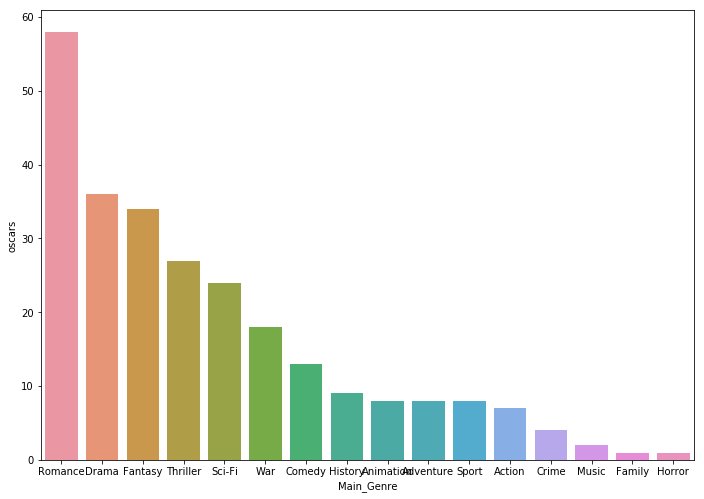

In [18]:
# plot the number of oscars per genre
data_plot = df1['Main_Genre'].value_counts().rename_axis('Main_Genre').reset_index(name='oscars')

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.barplot(x='Main_Genre', y='oscars', data=data_plot);


# 3. Which studio has the best Oscars to total movies produced ratio?
Although Warner Bros makes the largest total movies, it's oscar winning ratio is only 5th in the list.
Lionsgate Films has a favouritable ratio at 60%.

In [19]:
# amount of movies per studio (regardless of if the movie won an oscar)
movies_total = df['studio'].value_counts()

In [20]:
# convert to dataframe
movies_total = movies_total.rename_axis('studio').reset_index(name='movies_total')
movies_total.head()

,studio,movies_total
0,Warner Bros,174
1,Paramount Pictures,138
2,Walt Disney Pictures,108
3,Universal Pictures,96
4,Metro-Goldwyn-Mayer,77


In [21]:
# amount of movies that won at least 1 oscar per studio
amount_of_movies = df1_drop_duplicates['studio'].value_counts()
# convert to dataframe
amount_of_movies = amount_of_movies.rename_axis('studio').reset_index(name='movies_won_oscar')
amount_of_movies.head()

,studio,movies_won_oscar
0,Warner Bros,19
1,Walt Disney Pictures,16
2,Paramount Pictures,15
3,Universal Pictures,11
4,20th Century Fox,9


In [22]:
# amount of oscars won per studio
amount_of_oscars = df1['studio'].value_counts()
# convert to dataframe
amount_of_oscars = amount_of_oscars.rename_axis('studio').reset_index(name='oscars_total')
amount_of_oscars.head()

,studio,oscars_total
0,Warner Bros,54
1,Paramount Pictures,41
2,Universal Pictures,36
3,Metro-Goldwyn-Mayer,28
4,Walt Disney Pictures,28


In [23]:
merged = amount_of_movies.merge(amount_of_oscars, on = ['studio'])
merged = merged.merge(movies_total, on = ['studio'])
merged.head()

,studio,movies_won_oscar,oscars_total,movies_total
0,Warner Bros,19,54,174
1,Walt Disney Pictures,16,28,108
2,Paramount Pictures,15,41,138
3,Universal Pictures,11,36,96
4,20th Century Fox,9,14,58


In [24]:
merged['ratio_oscars'] = merged['oscars_total']/merged['movies_total']

In [27]:
merged.sort_values('ratio_oscars', ascending=False)

,studio,movies_won_oscar,oscars_total,movies_total,ratio_oscars
10,Lionsgate Films,1,6,10,0.600000
9,DreamWorks,4,16,40,0.400000
3,Universal Pictures,11,36,96,0.375000
5,Metro-Goldwyn-Mayer,9,28,77,0.363636
0,Warner Bros,19,54,174,0.310345
2,Paramount Pictures,15,41,138,0.297101
7,Pixar,7,9,33,0.272727
8,Sony Pictures,6,11,41,0.268293
1,Walt Disney Pictures,16,28,108,0.259259
4,20th Century Fox,9,14,58,0.241379


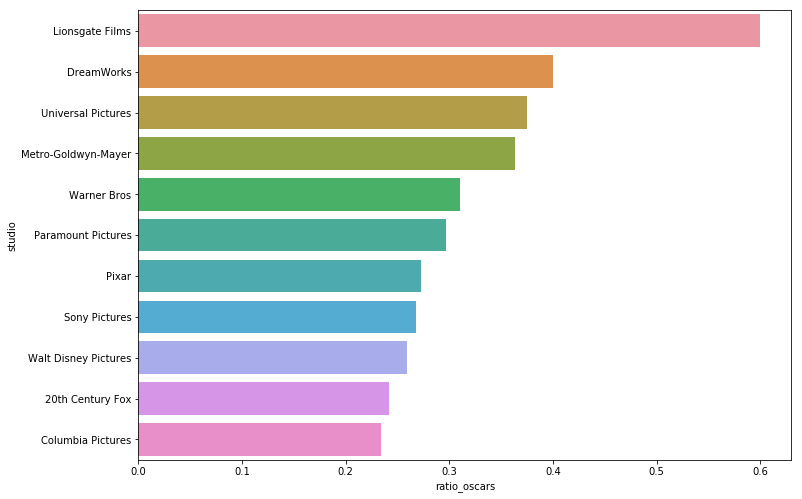

In [25]:
# plot the ratio of oscar for each studio

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.barplot(y='studio', x='ratio_oscars', data=merged.sort_values('ratio_oscars', ascending = False));

# 4. Plot number of nominations over the years and oscars

In [26]:
df.head()

,year_film,year_ceremony,ceremony,category,name,title,winner,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,worldwide_gross
0,1975,1976,48,ACTOR,Al Pacino,Dog Day Afternoon,False,Drama,Crime,NaN,8.1,125,4,R,Warner Bros,50000000.0
1,1975,1976,48,ACTOR IN A SUPPORTING ROLE,Chris Sarandon,Dog Day Afternoon,False,Drama,Crime,NaN,8.1,125,4,R,Warner Bros,50000000.0
2,1975,1976,48,DIRECTING,Sidney Lumet,Dog Day Afternoon,False,Drama,Crime,NaN,8.1,125,4,R,Warner Bros,50000000.0
3,1975,1976,48,FILM EDITING,Dede Allen,Dog Day Afternoon,False,Drama,Crime,NaN,8.1,125,4,R,Warner Bros,50000000.0
4,1975,1976,48,BEST PICTURE,"Martin Bregman and Martin Elfand, Producers",Dog Day Afternoon,False,Drama,Crime,NaN,8.1,125,4,R,Warner Bros,50000000.0


In [27]:
years_total = df['year_film'].value_counts().rename_axis('year').reset_index(name='nominations')
# years_total.head()

In [28]:
years_oscar = df1['year_film'].value_counts().rename_axis('year').reset_index(name='oscars')
# years_oscar.head()

In [29]:
merged_years = years_total.merge(years_oscar, on = ['year']).sort_values('year', ascending=True)
merged_years.head()

,year,nominations,oscars
29,1975,16,2
6,1976,28,10
1,1977,36,13
13,1978,24,7
11,1979,25,8


In [30]:
x = merged_years['year']
fig = go.Figure(data=[
    go.Scatter(name='winners', x=x, y=merged_years['oscars']),
    go.Scatter(name='total', x=x, y=merged_years['nominations'])
           ])
# Change the bar mode
fig.update_layout(barmode='group',title='Nominated movies grouped by studio', xaxis_title='year',
                  yaxis_title='nominatated movies')
fig.show()

NameError: name 'go' is not defined

In [118]:
# decline in overall movies being nominated and therefore decline in winners selected

# 5. Winning probability year to year

In [61]:
merged_years['winning_prob'] = merged_years['oscars']/merged_years['nominations']
fig = px.line(merged_years, x='year', y='winning_prob')
fig.show()

In [120]:
# there is a better chance of winning an oscar if you are nominated

**Question 6: What movie genre is most often present in blobkbuster shortlist?**

To answer this question, we visualise the count of each genre over the entire blockbuster dataset. 

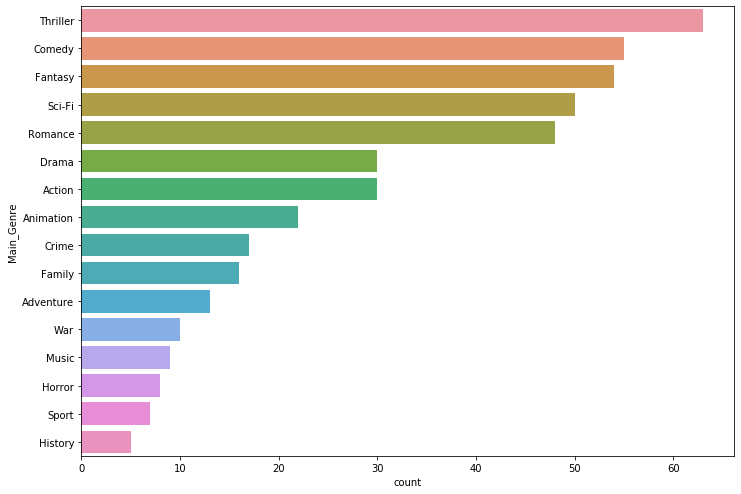

In [62]:
# visualise the genre most frequently present in blobkbuster shortlist

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

ax = sns.countplot(y="Main_Genre", data=blockbusters, order = blockbusters['Main_Genre'].value_counts().index)

Thriller seems to be the most common genre. However may that have varied over time? To verify this we visualise the proportion represented by each genre from the total of each specific year.

In [63]:
# compute count of movies across and within categories each year, to obtain proportion represented by each category

categories_each_year = (blockbusters
                        .rename({"year_film": "year"}, axis="columns")
   .assign(number_year = lambda df: df.groupby('year')['title'].transform(len))
   .assign(number_year_category = lambda df: df.groupby(['year', 'Main_Genre'])['title'].transform(len))
   .assign(category_per_year = lambda df: df['number_year_category'] / df['number_year'])
)

categories_each_year = categories_each_year[['Main_Genre', 'year','category_per_year']].drop_duplicates() 

categories_each_year = (categories_each_year
     .assign(temp=lambda df: df.groupby('year')['category_per_year'].shift())
     .fillna(0)
     .assign(bottom=lambda df: df.groupby('year')['temp'].cumsum()) #used for plotting
     .reset_index() 
     .drop(['temp', 'index'], axis=1)
)


# create a dataframe of all combinations of year and genre, with counts of genre (filled in with 0 if not in the blockbuster shortlist)

import itertools
a = blockbusters.year_film.unique()
b = blockbusters.Main_Genre.unique()
#c = [-1]
# result contains all possible combinations.
combinations = list(itertools.product(a,b))
combinations = pd.DataFrame.from_dict(combinations).rename(columns={0: "year", 1: "Main_Genre"}).assign(category_per_year=float(0),bottom=float(0))

categories_each_year_full = (combinations
                             .merge(categories_each_year, on = ['year','Main_Genre'], how='outer')
                             .fillna(0)
                             .drop(['category_per_year_x','bottom_x'], axis=1)
                             .sort_values(['year', 'Main_Genre'])
                            )

#create color mapping  

colors = ['chartreuse', 'olivedrab', 'darkseagreen', 'forestgreen','lightslategrey', 'darkturquoise', 'paleturquoise', 'cyan', 'cadetblue', 'lightblue', 'deepskyblue', 'darkmagenta', 'plum', 'cornflowerblue', 'midnightblue', 'blue']
color_map = {'Genre': categories_each_year_full.Main_Genre.unique(),
        'Color': colors}
color_map = pd.DataFrame(color_map, columns = ['Genre', 'Color'])

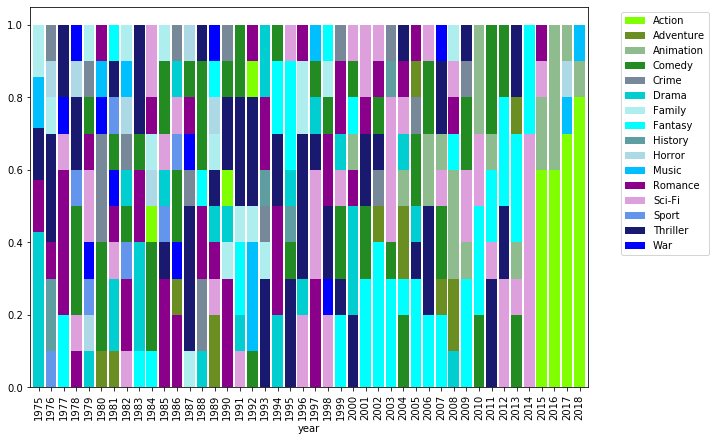

In [64]:
# visualise the proportions in a 100% stacked bar chart

fig, ax = pyplot.subplots()




for num, genre in enumerate(categories_each_year_full.Main_Genre.unique()):
    values = list(categories_each_year_full[categories_each_year_full['Main_Genre'] == genre].loc[:, 'category_per_year_y'])
    margin_bottom = list(categories_each_year_full[categories_each_year_full['Main_Genre'] == genre].loc[:, 'bottom_y'])
    categories_each_year_full[categories_each_year_full['Main_Genre'] == genre].plot.bar(x='year',y='category_per_year_y', ax=ax, stacked=True, 
                                   bottom = margin_bottom, label=genre, color=color_map[color_map['Genre'] == genre].loc[:, 'Color'], figsize=(10,7), width = 0.85)


pyplot.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

pyplot.show()



Although thriller was the main category overall, action movies seem to have been most popular lately. 

**Question 7: What movie genre brings the most revenue among blockbuster movies?**

Here again we'll compute revenue of movies across and within categories each year, to obtain proportion represented by each category

In [65]:
# the revenue variable is a string - we clean it and convert it to numeric

#blockbusters['worldwide_gross'] = blockbusters['worldwide_gross'].str.replace(',', '')
#blockbusters['worldwide_gross'] = blockbusters['worldwide_gross'].str.replace('$', '')
#blockbusters['worldwide_gross'] = pd.to_numeric(blockbusters['worldwide_gross'])

AttributeError: Can only use .str accessor with string values!

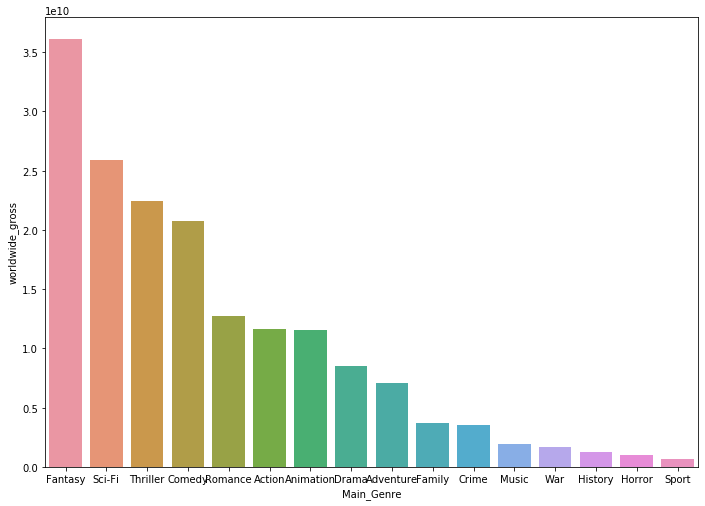

In [66]:
# visualise the revenue of each genre

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

ax = sns.barplot(x="Main_Genre", y='worldwide_gross', data=blockbusters, estimator=sum, ci=None, order=blockbusters.groupby('Main_Genre')['worldwide_gross'].sum().sort_values(ascending=False).index)


Fantasy seems to be the highest grossing genre. Thriller still comes third. We can now check again whether this varies by year. 

In [67]:
revenue_each_year = (blockbusters
                     .rename({"year_film": "year"}, axis="columns")
                     .assign(worldwide_gross = pd.to_numeric(blockbusters['worldwide_gross']))
                     .assign(revenue_year = lambda df: df.groupby('year')['worldwide_gross'].transform(sum))
                     .assign(revenue_year_category = lambda df: df.groupby(['year', 'Main_Genre'])['worldwide_gross'].transform(sum))
                     .assign(prop_revenue_per_category_year = lambda df: df['revenue_year_category'] / df['revenue_year'])
                    )

revenue_each_year.head()


revenue_each_year = revenue_each_year[['Main_Genre', 'year','prop_revenue_per_category_year']].drop_duplicates() 

revenue_each_year = (revenue_each_year
     .assign(temp=lambda df: df.groupby('year')['prop_revenue_per_category_year'].shift())
     .fillna(0)
     .assign(bottom=lambda df: df.groupby('year')['temp'].cumsum()) #used for plotting
     .reset_index() 
     .drop(['temp', 'index'], axis=1)
)

revenue_each_year_full = (combinations
                     .rename({"category_per_year": "prop_revenue_per_category_year"}, axis="columns")
                             .merge(revenue_each_year, on = ['year','Main_Genre'], how='outer')
                             .fillna(0)
                             .drop(['prop_revenue_per_category_year_x','bottom_x'], axis=1)
                             .sort_values(['year', 'Main_Genre'])
                            )



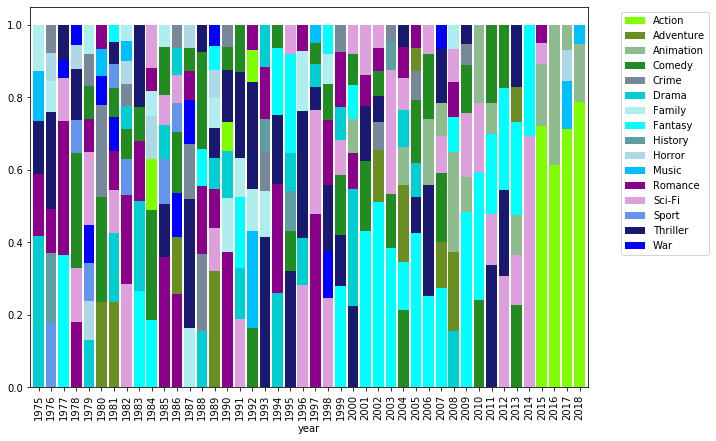

In [68]:
# visualise proportions

fig, ax = pyplot.subplots()

for num, genre in enumerate(revenue_each_year_full.Main_Genre.unique()):
    values = list(revenue_each_year_full[categories_each_year_full['Main_Genre'] == genre].loc[:, 'prop_revenue_per_category_year_y'])
    margin_bottom = list(revenue_each_year_full[categories_each_year_full['Main_Genre'] == genre].loc[:, 'bottom_y'])
    revenue_each_year_full[revenue_each_year_full['Main_Genre'] == genre].plot.bar(x='year',y='prop_revenue_per_category_year_y', ax=ax, stacked=True, 
                                   bottom = margin_bottom, label=genre, color=color_map[color_map['Genre'] == genre].loc[:, 'Color'], figsize=(10,7), width = 0.85)


pyplot.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

pyplot.show()
# here again action movies are seen to become more proeminent in recent years. 